# Project 1 - Milestone 3
# DSC 680: Applied Data Science
# Wittlieff, Alexa
# 9/25/2022

#### Load Dataset

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Import Titanic datasets
train_df = pd.read_csv(r'C:\Users\Alexa\Documents\GitHub\Wittlieff_Alexa_DSC680_GitHubRepository\Project 1\train.csv')
test_df = pd.read_csv(r'C:\Users\Alexa\Documents\GitHub\Wittlieff_Alexa_DSC680_GitHubRepository\Project 1\test.csv')

In [3]:
# Verify import success
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Verify import success
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Validation of Current Dataset State

In [5]:
# View data frame dimensions
train_df.shape

(891, 12)

In [6]:
# View data types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Check for null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Preparation

In [8]:
# Fill nulls for Age with mean value
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
print(train_df['Age'].mean())
mean_age = train_df['Age'].mean()

29.699117647058763


The Cabin column features 687 null values out of the 891 records in the train dataset. This equates to 77% of the data in this column missing. Therefore, I am electing to remove the column.

In [9]:
# Drop Cabin column
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [10]:
# Validate results
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [11]:
# Validate results
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [12]:
# Drop unnecessary columns
train_df = train_df.drop(['PassengerId', 'Name','Ticket'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [13]:
# Validate results
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [14]:
# Create Dummy Variable for Gender
train_df = pd.concat([train_df, pd.get_dummies(train_df['Sex'])], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Sex'])], axis=1)

# Remove the redundant dummy variable column & original Sex column
train_df = train_df.drop(['Sex','female'], axis=1)
test_df = test_df.drop(['Sex','female'], axis=1)

In [15]:
# Validate results
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


In [16]:
# Create Dummy Variable for Embarked
train_df = pd.concat([train_df, pd.get_dummies(train_df['Embarked'])], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Embarked'])], axis=1)


# Remove the original Embarked column
train_df = train_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)

In [17]:
# Validate results
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


### Data Exploration

In [18]:
# Correlation matrix
correlation_mat = train_df.corr()

In [19]:
# Display correlation matrix
correlation_mat

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.027121
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
C,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624
S,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,0.125722,-0.778359,-0.496624,1.000000


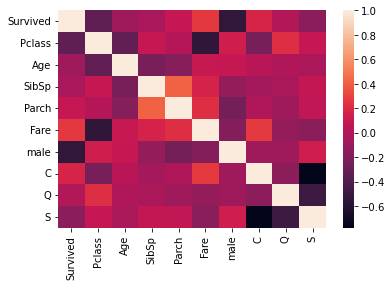

In [20]:
# Plot matrix using seaborn visualization library
sb.heatmap(correlation_mat)
plt.show()

In [21]:
# View the distribution of Survived
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Model Building & Evaluation

#### Load Libraries for Model Creation

In [22]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#### Create Training & Test Datasets

In [23]:
# Split into independent & dependent variables
dependent_feature=['Survived']
independent_feature=[col for col in train_df.columns if col not in dependent_feature]

print(independent_feature)
print(dependent_feature)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q', 'S']
['Survived']


In [24]:
x=train_df[independent_feature]
y=train_df[dependent_feature]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=510)
y_train = y_train.values.ravel()

#### Build KNN Model

In [26]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
x_train_s = standardizer.fit_transform(x_train)
x_test_s = standardizer.transform(x_test)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

# Build pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

In [27]:
# Fit pipeline
pipe.fit(x_train_s, y_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=4))])

In [28]:
# Build predictions
pipe_pred = pipe.predict(x_test_s)

In [29]:
# Calculate accuracy
accuracy_score(y_test, pipe_pred)

0.7932960893854749

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

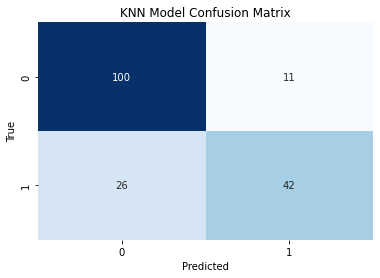

In [30]:
# Create confusion matrix
knn1_matrix = confusion_matrix(y_test, pipe_pred)

# Create pandas dataframe
knn1_c_df = pd.DataFrame(knn1_matrix)

# Create heatmap
ax= plt.subplot()
sns.heatmap(knn1_c_df, annot=True, fmt="d", cbar=None, cmap="Blues", ax=ax)
ax.set_title("KNN Model Confusion Matrix")
ax.set_ylabel("True"), ax.set_xlabel("Predicted")
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [31]:
# Load libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
p = "{:.0%}".format(precision_score(y_test, pipe_pred))

# Calculate Recall
r = "{:.0%}".format(recall_score(y_test, pipe_pred))

# Calculate F1-score
f1 = "{:.0%}".format(f1_score(y_test, pipe_pred))

# Print Evaluation Metrics
print("Precision:",p)
print("Recall:",r)
print("F1-score:",f1)

Precision: 79%
Recall: 62%
F1-score: 69%


#### Build Improved KNN Model

In [32]:
# Create search space for number of neighbors
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                     18, 19, 20, 21, 22, 23, 24, 25]}]

In [33]:
# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_train_s, y_train)

In [34]:
# Determine best value for neighbors
classifier.best_estimator_.get_params()["knn__n_neighbors"]

8

In [35]:
# Create KNN classifier
knn2 = KNeighborsClassifier(n_neighbors=8, n_jobs=-1)

# Build pipeline
pipe2 = Pipeline([("standardizer", standardizer), ("knn", knn2)])

In [37]:
# Fit pipeline
pipe2.fit(x_train_s, y_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=8))])

In [38]:
# Build predictions
pipe2_pred = pipe2.predict(x_test_s)

#### Evaluate Optimized KNN Model

In [39]:
# Calculate accuracy of optimized KNN neighbors
accuracy_score(y_test, pipe2_pred)

0.7932960893854749

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

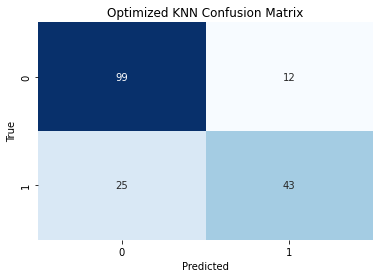

In [40]:
# Create confusion matrix
knn2_matrix = confusion_matrix(y_test, pipe2_pred)

# Pandas dataframe
knn2_c_df = pd.DataFrame(knn2_matrix)

# Create heatmap
ax= plt.subplot()
sns.heatmap(knn2_c_df, annot=True, fmt="d", cbar=None, cmap="Blues", ax=ax)
ax.set_title("Optimized KNN Confusion Matrix")
ax.set_ylabel("True"), ax.set_xlabel("Predicted")
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [41]:
# Calculate Precision
p = "{:.0%}".format(precision_score(y_test, pipe2_pred))

# Calculate Recall
r = "{:.0%}".format(recall_score(y_test, pipe2_pred))

# Calculate F1-score
f1 = "{:.0%}".format(f1_score(y_test, pipe2_pred))

# Print Evaluation Metrics
print("Precision:",p)
print("Recall:",r)
print("F1-score:",f1)

Precision: 78%
Recall: 63%
F1-score: 70%


#### Construct Random Forest Model

In [42]:
# Build Random Forest Model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model on training data
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [43]:
# Build predictions
rf_pred = rf.predict(x_test)

#### Evaluate Random Forest Model

In [44]:
# Calculate accuracy
accuracy_score(y_test, rf_pred)

0.770949720670391

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

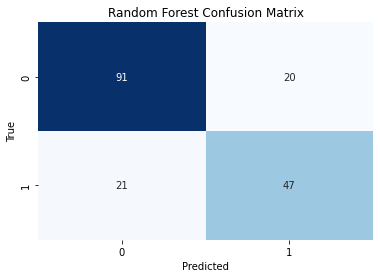

In [45]:
# Create confusion matrix
rf_matrix = confusion_matrix(y_test, rf_pred)

# Create pandas dataframe
rf_c_df = pd.DataFrame(rf_matrix)

# Create heatmap
ax= plt.subplot()
sns.heatmap(rf_c_df, annot=True, fmt="d", cbar=None, cmap="Blues", ax=ax)
ax.set_title("Random Forest Confusion Matrix")
ax.set_ylabel("True"), ax.set_xlabel("Predicted")
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [46]:
# Calculate Precision
p = "{:.0%}".format(precision_score(y_test, rf_pred))

# Calculate Recall
r = "{:.0%}".format(recall_score(y_test, rf_pred))

# Calculate F1-score
f1 = "{:.0%}".format(f1_score(y_test, rf_pred))

# Print Evaluation Metrics
print("Precision:",p)
print("Recall:",r)
print("F1-score:",f1)

Precision: 70%
Recall: 69%
F1-score: 70%


#### Construct Logistic Regression Model

In [47]:
# Load library
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
logistic_regression1 = LogisticRegression(random_state=0)

# Train model and predict
y_test_pred = logistic_regression1.fit(x_train_s, y_train).predict(x_test_s)

#### Evaluate Logistic Regression Model

In [48]:
# Calculate accuracy
accuracy_score(y_test, y_test_pred)

0.7821229050279329

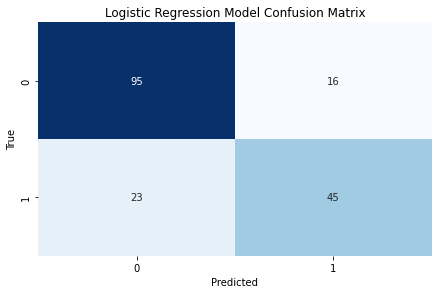

In [49]:
# Create confusion matrix
lg_matrix = confusion_matrix(y_test, y_test_pred)

# Create pandas dataframe
lg_c_df = pd.DataFrame(lg_matrix)

# Create heatmap
sns.heatmap(lg_c_df, annot=True, fmt="d", cbar=None, cmap="Blues")
plt.title("Logistic Regression Model Confusion Matrix"), plt.tight_layout()
plt.ylabel("True"), plt.xlabel("Predicted")
plt.show()

In [50]:
# Calculate Precision
p = "{:.0%}".format(precision_score(y_test, y_test_pred))

# Calculate Recall
r = "{:.0%}".format(recall_score(y_test, y_test_pred))

# Calculate F1-score
f1 = "{:.0%}".format(f1_score(y_test, y_test_pred))

# Print Evaluation Metrics
print("Precision:",p)
print("Recall:",r)
print("F1-score:",f1)

Precision: 74%
Recall: 66%
F1-score: 70%


#### Construct & Evaluate XGBoost Model

In [51]:
#pip install xgboost

In [52]:
# Load library
from xgboost import XGBClassifier

In [53]:
# Setup instance of model
xgboost = XGBClassifier()

In [54]:
# Train model
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [55]:
# Build predictions
predictions_xg = xgboost.predict(x_test)

In [56]:
# Calculate accuracy score
accuracy_score(y_test, predictions_xg)

0.7932960893854749

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

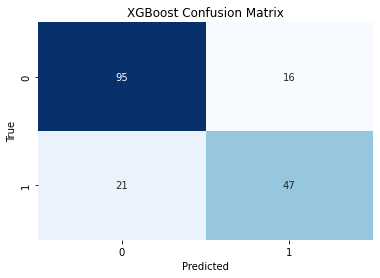

In [57]:
# Build confusion matrix
matrix_xg = confusion_matrix(y_test, predictions_xg)

# Create pandas df
xg_df = pd.DataFrame(matrix_xg)

# Create heatmap
ax= plt.subplot()
sns.heatmap(xg_df, annot=True, fmt="d", cbar=None, cmap="Blues", ax=ax)
ax.set_title("XGBoost Confusion Matrix")
ax.set_ylabel("True"), ax.set_xlabel("Predicted")
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [58]:
# Calculate Precision
p = "{:.0%}".format(precision_score(y_test, predictions_xg))

# Calculate Recall
r = "{:.0%}".format(recall_score(y_test, predictions_xg))

# Calculate F1-score
f1 = "{:.0%}".format(f1_score(y_test, predictions_xg))

# Print Evaluation Metrics
print("Precision:",p)
print("Recall:",r)
print("F1-score:",f1)

Precision: 75%
Recall: 69%
F1-score: 72%


#### Identify impactful features & potentially trim features

In [59]:
# Identify impactful features
pd.DataFrame(xgboost.feature_importances_.reshape(1,-1), columns=x_train.columns)

,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0.150271,0.032365,0.053088,0.027706,0.032896,0.606309,0.026602,0.013217,0.057547
